# Введение
Подключение необходимых библиотек

In [12]:
import pandas as pd
import numpy as np

In [13]:
%matplotlib widget
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
events_data = pd.read_csv("event_data_train.csv")
submissions = pd.read_csv("submissions_data_train.csv")

In [15]:
events_data.head()

,step_id,timestamp,action,user_id
0,32815,1434340848,viewed,17632
1,32815,1434340848,passed,17632
2,32815,1434340848,discovered,17632
3,32811,1434340895,discovered,17632
4,32811,1434340895,viewed,17632


In [16]:
submissions.head()

,step_id,timestamp,submission_status,user_id
0,31971,1434349275,correct,15853
1,31972,1434348300,correct,15853
2,31972,1478852149,wrong,15853
3,31972,1478852164,correct,15853
4,31976,1434348123,wrong,15853


## преобразование исходных данных

In [17]:
events_data["date"] = pd.to_datetime(events_data["timestamp"],unit='s')
events_data.head()

,step_id,timestamp,action,user_id,date
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48
1,32815,1434340848,passed,17632,2015-06-15 04:00:48
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35


In [18]:
events_data['day']=events_data['date'].dt.date
events_data.head()

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


In [19]:
submissions["date"] = pd.to_datetime(submissions['timestamp'],unit="s")
submissions["day"] = submissions["date"].dt.date
submissions.head()

,step_id,timestamp,submission_status,user_id,date,day
0,31971,1434349275,correct,15853,2015-06-15 06:21:15,2015-06-15
1,31972,1434348300,correct,15853,2015-06-15 06:05:00,2015-06-15
2,31972,1478852149,wrong,15853,2016-11-11 08:15:49,2016-11-11
3,31972,1478852164,correct,15853,2016-11-11 08:16:04,2016-11-11
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03,2015-06-15


# Анализ данных

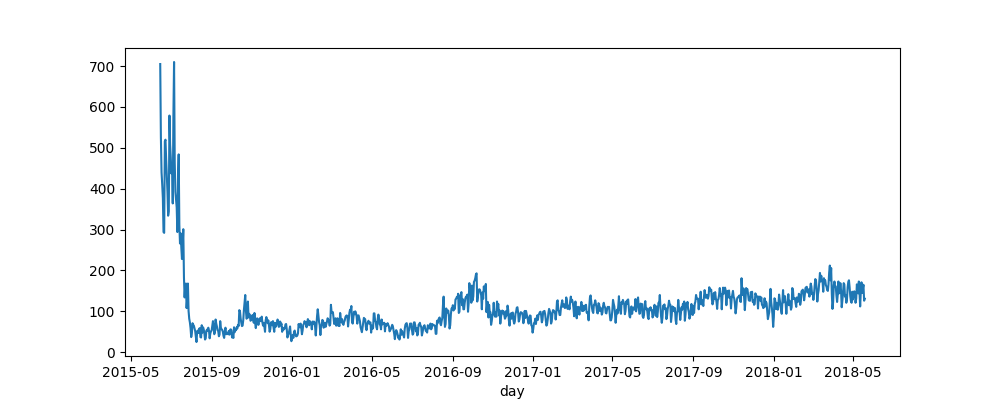

In [20]:
fig,ax = plt.subplots(figsize=(10,4))

day_users = events_data.groupby("day").user_id.nunique().plot(ax = ax)

## Подсчет участников с исползованием pivot таблиц

[]

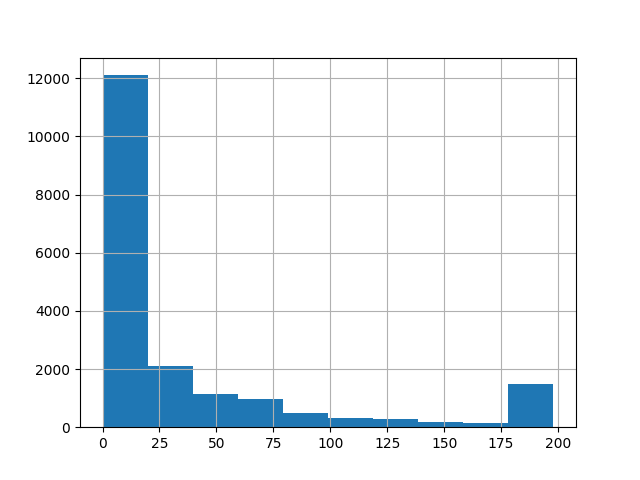

In [21]:
fig, ax = plt.subplots()
ax = events_data.pivot_table(index="user_id",columns="action",values="step_id",aggfunc="count",fill_value=0).discovered.hist()

ax.plot()

In [22]:
submissions.pivot_table(index="user_id", 
                             columns="submission_status", 
                             values="step_id", 
                             aggfunc="count", 
                             fill_value=0).head()


submission_status,correct,wrong
user_id,,
2,2,0
3,29,23
5,2,2
8,9,21
14,0,1


## Определение участников "выпавших из курса"

In [ ]:
events_data[["user_id","day","timestamp"]] / 
.drop_duplicates(subset=["user_id","day"]).head()

,user_id,day,timestamp
0,17632,2015-06-15,1434340848
36,12494,2015-06-15,1434341931
59,442,2015-06-15,1434342029
62,22254,2015-06-15,1434342042
94,6646,2015-06-15,1434342230


,user_id,day,timestamp
0,17632,2015-06-15,1434340848
3,17632,2015-06-15,1434340895
6,17632,2015-06-15,1434340921
8,17632,2015-06-15,1434340939
9,17632,2015-06-15,1434340944
...,...,...,...
3480346,943,2018-05-19,1526762739
3480352,943,2018-05-19,1526762781
3480353,943,2018-05-19,1526762783
3480669,26659,2018-05-19,1526770439
